# Contents
## 0) Import Modules & Dataset
## 1) Scatterplot Exploration
## 2) Hypothesis
## 3) Linear Regression
## 4) Summary Statistics
## 5) Compare Values
## 6) Conclusion

# 0) Import Modules & Dataset

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/reg_flag_derivation.csv')

# 1) Scatterplot Exploration

In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'lat', 'long', 'type', 'depth', 'mag',
       'mag_type', 'rms', 'id', 'source', 'status', 'reg_flag'],
      dtype='object')

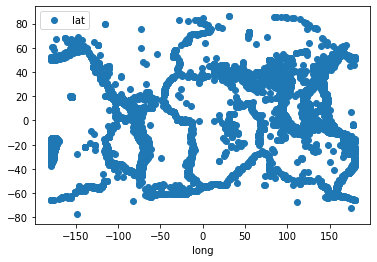

In [20]:
df.plot(x='long', # Test latitude vs longitude
       y='lat',
       style='o')

# 2) Hypothesis

### Regressive analysis line for earthquakes will pass through 20 - 40 degrees longtiude

# 3) Linear Regression

In [22]:
X=df['long'].values.reshape(-1,1) # Reshape variables into numpy arrays
y=df['lat'].values.reshape(-1,1)

In [23]:
# Split the data into a training set and a test set.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
# Run linear regression on data

regression=LinearRegression()

In [25]:
regression.fit(X_train,y_train) # Fit the model for the training set

LinearRegression()

In [26]:
y_predicted=regression.predict(X_test) # Create a prediction for y on the test set

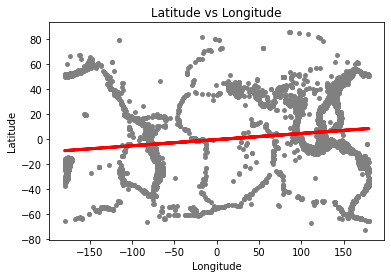

In [29]:
plot_test=plt
plot_test.scatter(X_test,
                 y_test,
                 color='gray',
                 s=15)
plot_test.plot(X_test,
              y_predicted,
              color='red',
              linewidth=3)
plot_test.title('Latitude vs Longitude')
plot_test.xlabel('Longitude')
plot_test.ylabel('Latitude')
plot_test.show()

### Interpretation:
- Line of best fit adheres somewhat to the equator

# 4) Summary Statistics

In [37]:
df['lat'].mean()

1.6699386526518425

In [38]:
df['lat'].median()

-3.579

In [39]:
df['lat'].mode()

0    -5.902
1    -5.605
2    -5.589
3    51.500
dtype: float64

In [40]:
df['long'].mean()

39.66144654613433

In [41]:
df['long'].median()

104.015

In [42]:
df['long'].mode()

0    126.777
dtype: float64

In [30]:
rmse=mean_squared_error(y_test,y_predicted)
r2=r2_score(y_test,y_predicted)

In [31]:
print('Slope: ',regression.coef_)
print('Mean Squared Error: ',rmse)
print('R2 score: ',r2)

Slope:  [[0.04911203]]
Mean Squared Error:  868.385469581841
R2 score:  0.041212292413184914


# 5) Compare Values

In [43]:
# Create a dataframe comparing actual and predicted values of 'y'

data=pd.DataFrame({'Actual':y_test.flatten(),
                  'Predicted':y_predicted.flatten()})

In [45]:
data.sample(20)

,Actual,Predicted
2535,-32.7800,-8.979042
6243,-10.9350,7.949679
2191,-29.9614,-3.730101
4,-17.3340,-3.750625
2567,35.3050,-0.401184
1483,-33.4120,-3.729261
3167,4.2640,5.842281
3066,-4.1660,6.256001
1859,-17.7040,-8.774736
1188,35.8660,3.721820


# 6) Conclusion

- You don't need to experiment much further to determine that the line of best fit is not linear. I believe I will need a more sophisticated method to find useful patterns.
- Even if there is any data bias regarding this analysis, I don't believe it would affect the outcome of this regression.
 - Note that this dataset does not contain variables that would profit from a linear regression ('rms' is root mean squared)